<a href="https://colab.research.google.com/github/olesjaeidelman/Unit2-Assignment/blob/main/Unit2_Project2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit3: Data Analytics in Python - Project 2
*   Visit the github page and load in the cdc dataset to your jupyter notebook
*   https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv


The dataset has multiple medical indictors and diseases, your task is to create a descriptive analysis of data within the dataset.

For this dataset, you will need to use:
*   Data wrangling and cleaning
*   Renaming variables
*   Filtering data
*   Data aggregation
*   Data Visualization techniques
*   Descriptive statistics 
*   Detailed descriptions of everything in your dataset – look up how to add markdown to your notebook


# Data Exploration

In [1]:
#Import all libraries that will be used for analysis
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Import the dataset that will be used for analysis
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
#Shows top 5 rows of data. This dataset is pretty wide, so I will limit columns that I will be using for analysis
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#This dataset has 101,766 rows and 50 columns
df.shape

(101766, 50)

In [4]:
df.describe()
#Some interesting findings here:
#   - Looking at admission_type_id column, we can see that on average, patient has 2 admissions; with largest number of admissions equal to 8
#   - This dataset might have some outliers, for example, maximum number of inpatient admissions is 21, but mean is only 0.625566

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#Count encounters by patient; One patient could have multiple encountes, with the biggest encounter count of 40
df.groupby(['patient_nbr'])['encounter_id'].count().sort_values(ascending = False)

patient_nbr
88785891     40
43140906     28
1660293      23
23199021     23
88227540     23
             ..
34935156      1
34935795      1
34935804      1
34937658      1
189502619     1
Name: encounter_id, Length: 71518, dtype: int64

In [7]:
#Find out how much duplication we have in this file. There are no records that are entirely duplicated
df[df.duplicated(keep=False)]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


# Data Preparation

In [8]:
#Show all columns in the data frame
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
#I am going to focus on diabetes statistics based on race, gender and age category
#Since encounter data has duplicated patient data, I will need to remove dups. Expected number of unique patient records = 77,326
df.groupby(['patient_nbr','race', 'gender','age','diabetesMed'])['patient_nbr'].count().sort_values(ascending = False)

patient_nbr  race             gender  age      diabetesMed
88785891     Caucasian        Female  [20-30)  Yes            39
23643405     Caucasian        Female  [20-30)  Yes            22
43140906     Caucasian        Female  [20-30)  Yes            22
92709351     Caucasian        Female  [40-50)  Yes            21
88227540     AfricanAmerican  Female  [40-50)  Yes            21
                                                              ..
32954247     Caucasian        Male    [80-90)  Yes             1
32957397     Caucasian        Female  [80-90)  No              1
32958135     Caucasian        Male    [50-60)  Yes             1
32958549     Caucasian        Male    [60-70)  Yes             1
189502619    Caucasian        Male    [40-50)  Yes             1
Name: patient_nbr, Length: 77326, dtype: int64

In [10]:
# 3 - Remove columns that I will not be using, so dataset is more manageable:
drop_cols = ['encounter_id', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted']
df.drop(drop_cols, inplace = True, axis = 1)

In [11]:
#Updated size of my dataset is 101,766 rows and 5 columns
df

,patient_nbr,race,gender,age,diabetesMed
0,8222157,Caucasian,Female,[0-10),No
1,55629189,Caucasian,Female,[10-20),Yes
2,86047875,AfricanAmerican,Female,[20-30),Yes
3,82442376,Caucasian,Male,[30-40),Yes
4,42519267,Caucasian,Male,[40-50),Yes
...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),Yes
101762,74694222,AfricanAmerican,Female,[80-90),Yes
101763,41088789,Caucasian,Male,[70-80),Yes
101764,31693671,Caucasian,Female,[80-90),Yes


In [12]:
#There will some duplication since I am looking at patient level data, that could be the same across different encounters
df[df.duplicated(keep=False)]

,patient_nbr,race,gender,age,diabetesMed
12,85504905,Caucasian,Female,[40-50),Yes
27,115196778,Caucasian,Female,[50-60),Yes
28,41606064,Caucasian,Male,[20-30),Yes
32,80845353,Caucasian,Female,[70-80),Yes
33,114715242,Caucasian,Male,[60-70),Yes
...,...,...,...,...,...
101759,86472243,Caucasian,Male,[80-90),Yes
101760,50375628,AfricanAmerican,Female,[60-70),Yes
101762,74694222,AfricanAmerican,Female,[80-90),Yes
101763,41088789,Caucasian,Male,[70-80),Yes


In [13]:
#Remove duplicated rows
df = df.drop_duplicates()

In [15]:
#Deduplicated dataset matches to number of unique patients I anticipated
df.shape

(77326, 5)

In [ ]:
#There could be some additional duplication because the data set appears to have more than one year of patient data.
#I am going to keep these records as is. We will need to set rules of selecting unique records if we want to deduplicate it. For example, picking the largest age group, etc.
df[df['patient_nbr'].duplicated(keep=False)]

In [18]:
#This pivot table shows that there are some race values with unknown values, I am going to remove them
df.pivot_table(values='patient_nbr', index=['diabetesMed','age'], columns=['gender','race'],fill_value=0, aggfunc='count', margins = True)

gender               Female                        ... Unknown/Invalid          All
race                      ? AfricanAmerican Asian  ...               ? Other       
diabetesMed age                                    ...                             
No          [0-10)        1               1     0  ...               0     0     26
            [10-20)       0              14     0  ...               0     0     87
            [20-30)      10              49     2  ...               0     0    284
            [30-40)       9             145     2  ...               0     0    798
            [40-50)      19             274     5  ...               0     0   1895
            [50-60)      33             417    13  ...               0     0   3276
            [60-70)      43             453    11  ...               1     0   4102
            [70-80)      49             480    19  ...               0     0   4997
            [80-90)      35             280    20  ...               0     0   3597
            [90-100)      9              82     1  ...               0     0    718
Yes         [0-10)        0               7     1  ...               0     0    130
            [10-20)       3              80     2  ...               0     0    467
            [20-30)      20             215     3  ...               0     0    900
            [30-40)      33             420     7  ...               0     0   2066
            [40-50)      68             847    16  ...               0     0   5442
            [50-60)     120            1376    22  ...               0     0  10057
            [60-70)     161            1353    56  ...               0     0  13066
            [70-80)     219            1299    56  ...               1     1  14768
            [80-90)     156             658    31  ...               0     0   9194
            [90-100)     29             132     4  ...               0     0   1456
All                    1017            8582   271  ...               2     1  77326

[21 rows x 15 columns]

In [19]:
#Remove any records that have question marks as a race value. Total 2,012 rows will be removed
df[df['race'] =='?']

,patient_nbr,race,gender,age,diabetesMed
19,69422211,?,Male,[70-80),Yes
20,22864131,?,Female,[50-60),Yes
21,21239181,?,Male,[60-70),Yes
54,113848434,?,Female,[60-70),Yes
65,58231314,?,Female,[90-100),Yes
...,...,...,...,...,...
101537,158668952,?,Male,[60-70),Yes
101659,58188375,?,Female,[70-80),Yes
101671,151756061,?,Female,[60-70),Yes
101715,147936164,?,Male,[50-60),Yes


In [21]:
#Remove race values with question marks
df = df[df['race'] !='?']
df

,patient_nbr,race,gender,age,diabetesMed
0,8222157,Caucasian,Female,[0-10),No
1,55629189,Caucasian,Female,[10-20),Yes
2,86047875,AfricanAmerican,Female,[20-30),Yes
3,82442376,Caucasian,Male,[30-40),Yes
4,42519267,Caucasian,Male,[40-50),Yes
...,...,...,...,...,...
101756,140199494,Other,Female,[60-70),Yes
101757,181593374,Caucasian,Female,[70-80),Yes
101758,120975314,Caucasian,Female,[80-90),Yes
101761,100162476,AfricanAmerican,Male,[70-80),Yes


In [23]:
#Remove gender values with Unknown/Invalid entry
df = df[df['gender'] !='Unknown/Invalid']
df

,patient_nbr,race,gender,age,diabetesMed
0,8222157,Caucasian,Female,[0-10),No
1,55629189,Caucasian,Female,[10-20),Yes
2,86047875,AfricanAmerican,Female,[20-30),Yes
3,82442376,Caucasian,Male,[30-40),Yes
4,42519267,Caucasian,Male,[40-50),Yes
...,...,...,...,...,...
101756,140199494,Other,Female,[60-70),Yes
101757,181593374,Caucasian,Female,[70-80),Yes
101758,120975314,Caucasian,Female,[80-90),Yes
101761,100162476,AfricanAmerican,Male,[70-80),Yes


In [24]:
#Rerun pivot table to confirm that we removed all values correctly
df.pivot_table(values='patient_nbr', index=['diabetesMed','age'], columns=['gender','race'],fill_value=0, aggfunc='count', margins = True)

gender                        Female                  ...     Male          All
race                 AfricanAmerican Asian Caucasian  ... Hispanic Other       
diabetesMed age                                       ...                      
No          [0-10)                 1     0         9  ...        0     1     25
            [10-20)               14     0        35  ...        2     1     87
            [20-30)               49     2       131  ...        3     1    272
            [30-40)              145     2       316  ...       12     4    782
            [40-50)              274     5       638  ...       32    15   1858
            [50-60)              417    13      1078  ...       39    30   3205
            [60-70)              453    11      1423  ...       50    39   4007
            [70-80)              480    19      2087  ...       41    25   4917
            [80-90)              280    20      1829  ...       10    12   3536
            [90-100)              82     1       430  ...        1     1    704
Yes         [0-10)                 7     1        61  ...        0     3    130
            [10-20)               80     2       165  ...        7     4    458
            [20-30)              215     3       292  ...       14    12    874
            [30-40)              420     7       624  ...       57    22   2008
            [40-50)              847    16      1561  ...      100    66   5279
            [50-60)             1376    22      3138  ...      118   114   9787
            [60-70)             1353    56      4519  ...      135   146  12709
            [70-80)             1299    56      6049  ...       96   104  14335
            [80-90)              658    31      4605  ...       31    28   8931
            [90-100)             132     4       821  ...        3     3   1409
All                             8582   271     29811  ...      751   631  75313

[21 rows x 11 columns]

# Data Analysis

In [25]:
#Create a pivot table that illustrate how patient counts are broken down by age and race
df_pivot = df.pivot_table(values='patient_nbr', index='age', columns='race',fill_value=0, aggfunc='count')
df_pivot

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
age,,,,,
[0-10),16,2,131,2,4
[10-20),163,2,351,21,8
[20-30),389,6,675,54,22
[30-40),909,13,1658,146,64
[40-50),2014,48,4685,250,140
[50-60),3129,97,9169,336,261
[60-70),3139,131,12735,372,339
[70-80),2774,155,15733,312,278
[80-90),1328,76,10827,115,121


The pivot table above illustrates that largest diabetic population count is for 70-80 age category, Caucasian race, followed by AfricanAmerican. Caucasian race appears to have biggest counts for all age bins.


*   Bar chart below confirms the same trend; it depicts that Caucasian race has the largest diabetes counts across all age groups.

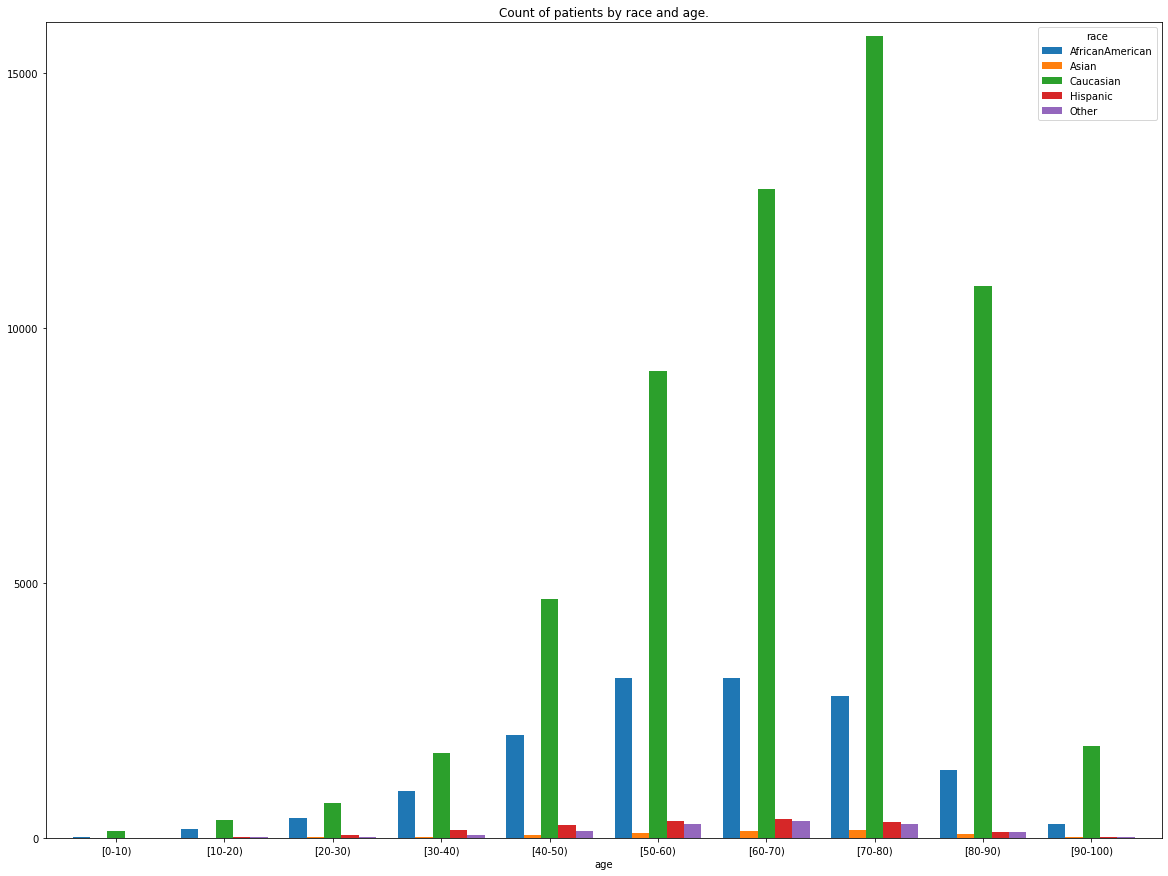

In [33]:
df_pivot.plot.bar(ylim=(0,16000),yticks=np.arange(0,16000,5000), figsize = (20, 15), rot = 0, stacked = False, width = .8, title = "Count of patients by race and age.")
#I increased chart size from the default setting and increased bar width. Tick marks are custom set to 5000 increments.

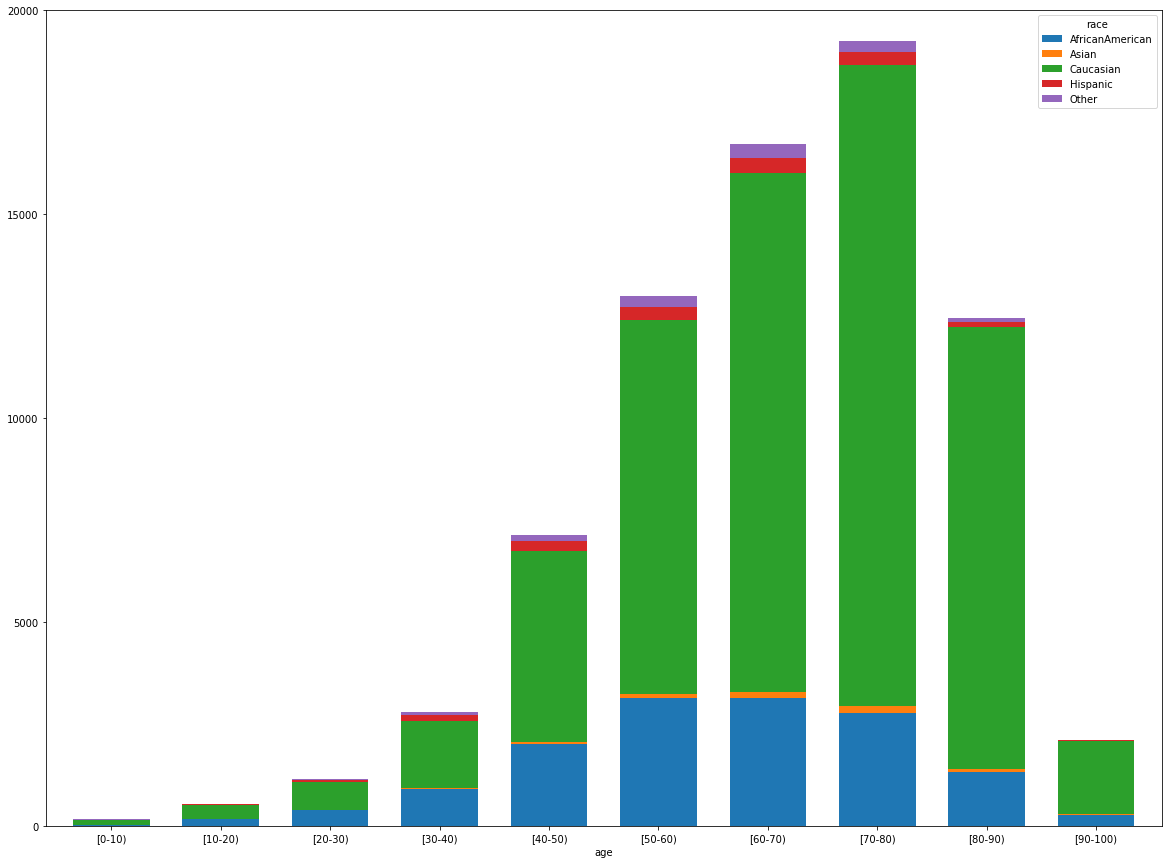

In [34]:
#This bar plot shows an alternative display of the same data, but using stacked columns instead of side-by-side bars
df_pivot.plot.bar(ylim=(0,20000),yticks=np.arange(0,21000,5000), figsize = (20, 15), rot = 0, stacked = True, width = .7)

In [35]:
#Find out which age group has the biggest diabetes population regardless of the race.
df_age = df.pivot_table(values='patient_nbr', index='age', fill_value=0, aggfunc='count')
df_age

,patient_nbr
age,
[0-10),155
[10-20),545
[20-30),1146
[30-40),2790
[40-50),7137
[50-60),12992
[60-70),16716
[70-80),19252
[80-90),12467


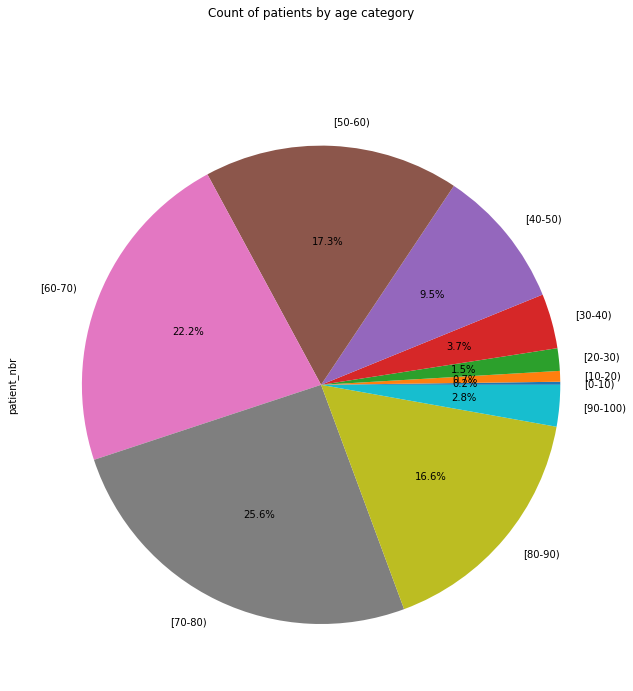

In [36]:
#Use pie chart to illustrate count breakdown
plot = df_age.plot.pie(subplots=True, figsize=(11, 11), title = "Count of patients by age category", autopct='%1.1f%%', legend=False)

Both pivot table and pie chart above illustrate that age bin from 70-80 has the largest diabetic patient count of 19,252 (or 25.6%), followed by 60-70 age bin that totals 16,716 (or 22.2%). Ages 40 and above account for 94% of diabetes population.

In [37]:
#Take data that relates only to 70-80 age group.
df_70_80 = df[df['age'] =='[70-80)']
df_70_80

,patient_nbr,race,gender,age,diabetesMed
7,114882984,Caucasian,Male,[70-80),Yes
18,107389323,AfricanAmerican,Male,[70-80),Yes
22,63000108,AfricanAmerican,Female,[70-80),No
24,62718876,AfricanAmerican,Female,[70-80),Yes
31,96664626,AfricanAmerican,Male,[70-80),Yes
...,...,...,...,...,...
101751,175326800,Caucasian,Male,[70-80),Yes
101754,183087545,Caucasian,Female,[70-80),Yes
101757,181593374,Caucasian,Female,[70-80),Yes
101761,100162476,AfricanAmerican,Male,[70-80),Yes


In [38]:
#For the biggest age group with diabetes, what is breakdown by race?
df_pivot_70_80 = df_70_80.pivot_table(values='patient_nbr', index='race', fill_value=0, aggfunc='count')
df_pivot_70_80

,patient_nbr
race,
AfricanAmerican,2774
Asian,155
Caucasian,15733
Hispanic,312
Other,278


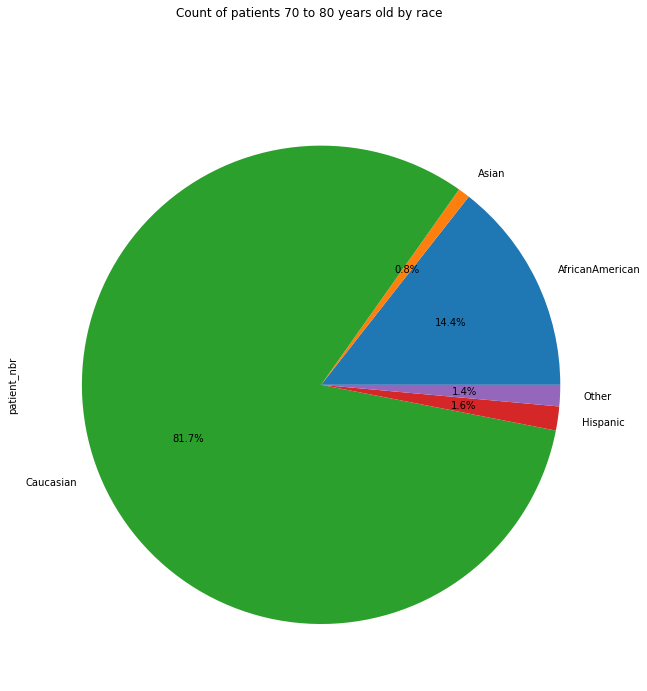

In [39]:
#Illustrate counts by race breakdown using pie chart
plot = df_pivot_70_80.plot.pie(subplots=True, figsize=(11, 11), title = "Count of patients 70 to 80 years old by race ", autopct='%1.1f%%', legend=False)

In [40]:
#Pivot table by age, gender and race with row and column totals (uses margins property)
df_pivot_all = df.pivot_table(values='patient_nbr', index=['diabetesMed','age'], columns=['gender','race'],fill_value=0, aggfunc='count', margins = False)
df_pivot_all

gender                        Female                  ...      Male               
race                 AfricanAmerican Asian Caucasian  ... Caucasian Hispanic Other
diabetesMed age                                       ...                         
No          [0-10)                 1     0         9  ...        12        0     1
            [10-20)               14     0        35  ...        21        2     1
            [20-30)               49     2       131  ...        50        3     1
            [30-40)              145     2       316  ...       192       12     4
            [40-50)              274     5       638  ...       629       32    15
            [50-60)              417    13      1078  ...      1219       39    30
            [60-70)              453    11      1423  ...      1579       50    39
            [70-80)              480    19      2087  ...      1901       41    25
            [80-90)              280    20      1829  ...      1207       10    12
            [90-100)              82     1       430  ...       153        1     1
Yes         [0-10)                 7     1        61  ...        49        0     3
            [10-20)               80     2       165  ...       130        7     4
            [20-30)              215     3       292  ...       202       14    12
            [30-40)              420     7       624  ...       526       57    22
            [40-50)              847    16      1561  ...      1857      100    66
            [50-60)             1376    22      3138  ...      3734      118   114
            [60-70)             1353    56      4519  ...      5214      135   146
            [70-80)             1299    56      6049  ...      5696       96   104
            [80-90)              658    31      4605  ...      3186       31    28
            [90-100)             132     4       821  ...       392        3     3

[20 rows x 10 columns]

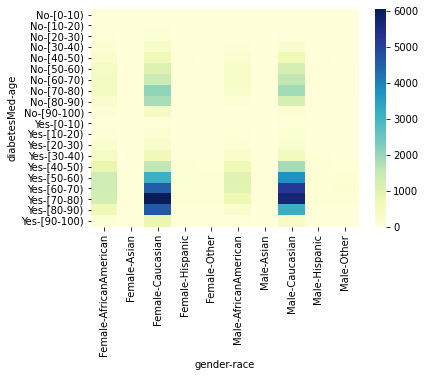

In [41]:
#This plot shows heat map of pivot table above. I haven't figure out how to increase the size of it.
swarm_plot = sns.heatmap(df_pivot_all, cmap="YlGnBu", annot=False, cbar=True)